In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import pdb

plt.style.use('ggplot')

In [2]:
pi = np.pi

def coneSolidAngle(r,h,theta):
    return pi * np.sin(theta) * (r/h)**2

def perpendicular( a ) :
    b = np.empty_like(a)
    b[0] = a[1]
    b[1] = -a[0]
    return b

def normalize(a):
    a = np.array(a)
    return a/np.linalg.norm(a)

def dipolesOnSphere(numSample, dipoleMagnitude):
    dipoleLocation = np.zeros((numSample, 3))
    dipoleMoment = np.zeros((numSample, 3))
    
    for i in range(numSample):
        u = np.random.normal(0,1)
        v = np.random.normal(0,1)
        w = np.random.normal(0,1)
        norm = (u*u + v*v + w*w)**(0.5)
        location = np.array([u,v,w])/norm
        
        dipoleLocation[i,:] = location
        dipoleMoment[i,:] = dipoleMagnitude * location/np.linalg.norm(location)
    
    return dipoleLocation, dipoleMoment

def dipolesOnDisk(trialPoints, dipoleMagnitude):
    dipoleLocation = []
    dipoleMoment = []

    for i in range(trialPoints):
        a = np.array([2 * np.random.random() - 1, 2 * np.random.random() - 1, 0.])
        if np.linalg.norm(a) <= 1:
            dipoleLocation.append(a)
            dipoleMoment.append([0.,0., dipoleMagnitude])


    dipoleLocation = np.array(dipoleLocation)
    dipoleMoment = np.array(dipoleMoment)
    return dipoleLocation, dipoleMoment

def dipolePotential(p, dipoleLocation, dipoleArray):
    rows, _ = dipoleArray.shape
    potential = 0
    for i in range(rows):
        thisDipole = dipoleArray[i,:]
        thisLocation = dipoleLocation[i,:]
        thisDisplacement = p - thisLocation
        thisUnitDisplacement = normalize(thisDisplacement)
        contrib = np.dot(thisDipole, thisUnitDisplacement)/np.linalg.norm(thisDisplacement)**2
        potential = potential + contrib
    return potential


In [15]:
# DIPOLES ON UNIT SPHERE

nSample = 100
dipoleMagnitude = .01
dipoleLocation, dipoleMoment = dipolesOnSphere(nSample, dipoleMagnitude)

<IPython.core.display.Javascript object>


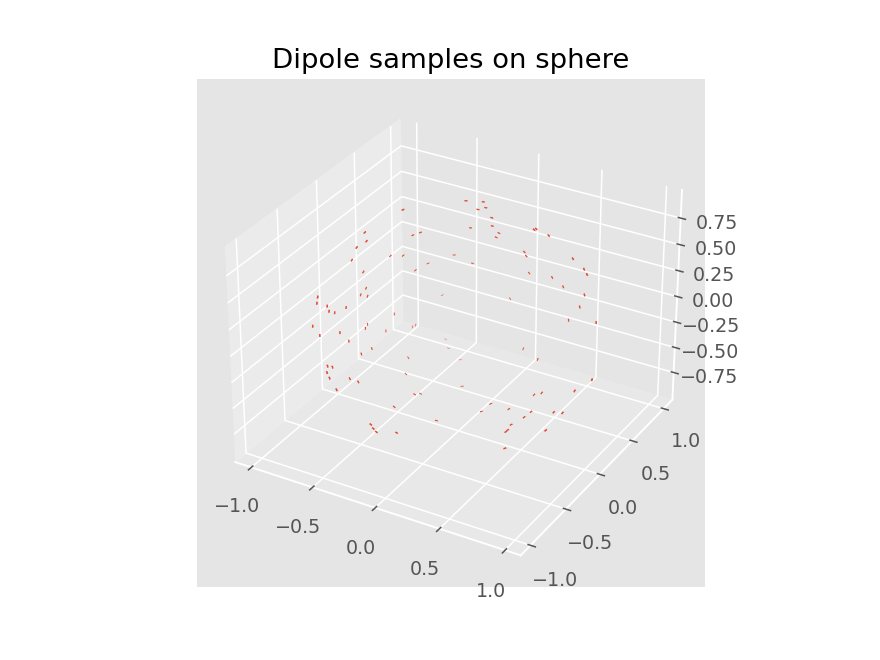

In [16]:
ax = plt.figure().add_subplot(projection='3d')
x = dipoleLocation[:,0]
y = dipoleLocation[:,1]
z = dipoleLocation[:,2]
u = dipoleMoment[:,0]
v = dipoleMoment[:,1]
w = dipoleMoment[:,2]
ax.quiver(x, y, z, u, v, w)
plt.title('Dipole samples on sphere')
plt.show()

In [17]:
p0 = np.array([0.,0.,100.])
p1 = np.array([0., 0., 400.])
print("Outer point: ", p1)
print("Inner point: ", p0)
potential0 = dipolePotential(p0, dipoleLocation, dipoleMoment)
potential1 = dipolePotential(p1, dipoleLocation, dipoleMoment)
print("Ratio of potentials: ", potential0/potential1)

Outer point:  [  0.   0. 400.]
Inner point:  [  0.   0. 100.]
Ratio of potentials:  15.756618588958817


<IPython.core.display.Javascript object>


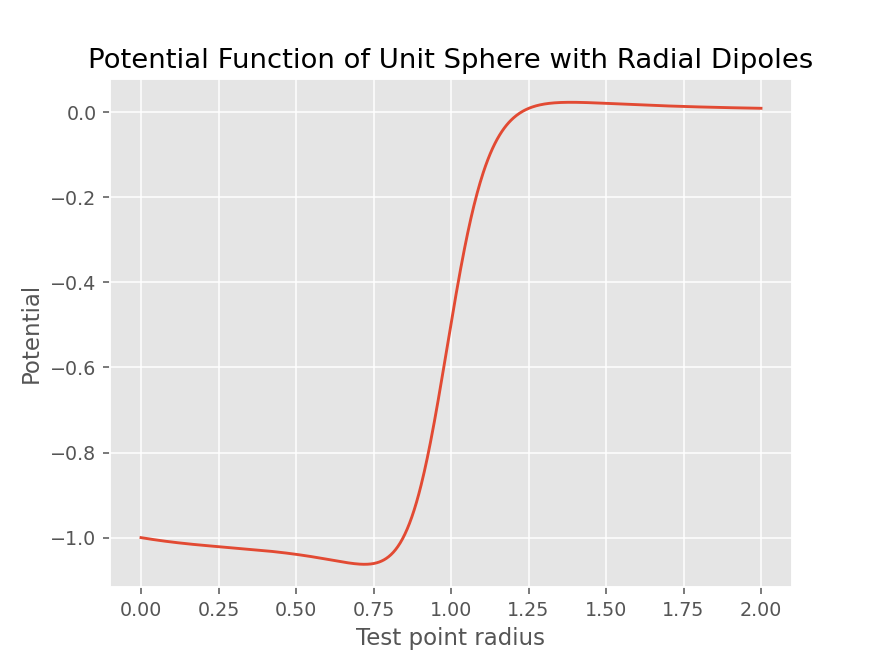

In [18]:
upperBound = 2.
nSample = int(4 * upperBound/dipoleMagnitude)
samplePoints = np.linspace(0., upperBound, nSample)
potential = np.zeros(nSample)

for i,z in enumerate(samplePoints):
    potential[i] = dipolePotential(np.array([0., 0., z]),dipoleLocation, dipoleMoment)
    
plt.figure()
plt.plot(samplePoints, potential)
plt.xlabel('Test point radius');
plt.ylabel('Potential');
plt.title('Potential Function of Unit Sphere with Radial Dipoles');

In [7]:
# DISK
dipoleLocation, dipoleMoment = dipolesOnDisk(100000, .01)

<IPython.core.display.Javascript object>


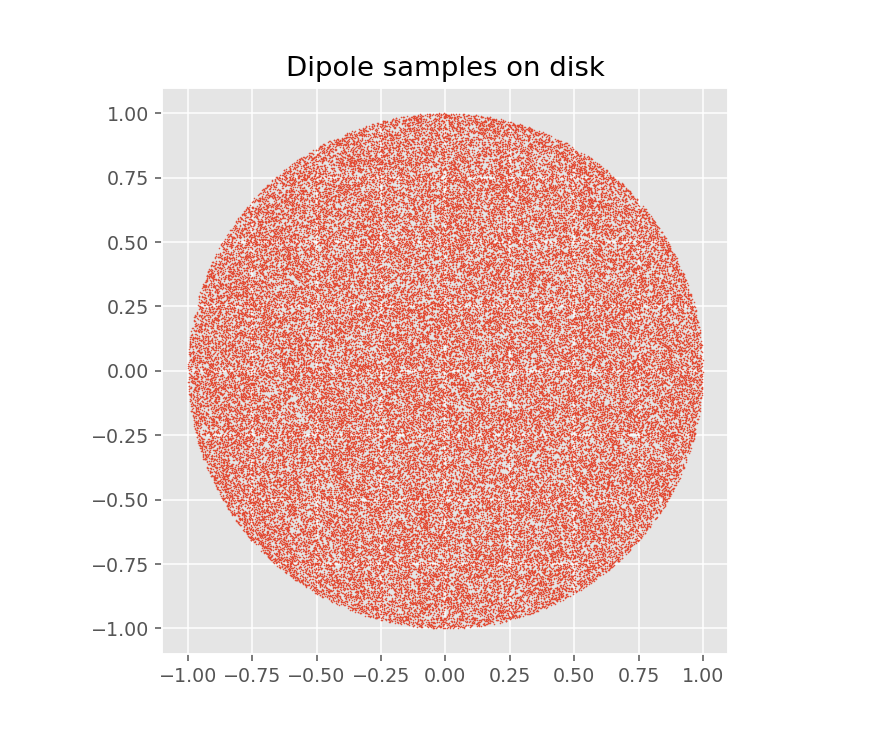

In [8]:
plt.figure()
plt.axes().set_aspect('equal')
plt.scatter(dipoleLocation[:,0], dipoleLocation[:,1], s=.1)
plt.title('Dipole samples on disk');

In [9]:
outerDistance = 200.
innerDistance = 100.
theta = np.arcsin((innerDistance/outerDistance) ** 2)

p0 = np.array([0., 100. * np.cos(theta),100. * np.sin(theta)])
p1 = np.array([0., 0., outerDistance])
print("Outer point: ", p1)
print("Inner point: ", p0)
print("Ratio of solid angles: ", coneSolidAngle(1.,innerDistance, theta) / coneSolidAngle(1.,outerDistance, pi/2))

Outer point:  [  0.   0. 200.]
Inner point:  [ 0.         96.82458366 25.        ]
Ratio of solid angles:  1.0


In [10]:
potential0 = dipolePotential(p0, dipoleLocation, dipoleMoment)
potential1 = dipolePotential(p1, dipoleLocation, dipoleMoment)
print("Ratio of potentials: ", potential0/potential1)

Ratio of potentials:  1.0000595602505693
